# San Diego County Rental Dataset
---

In [1]:
# 1. Setup - San Diego Rental Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a San Diego beach/sunset style
sns.set_theme(style="whitegrid", palette="pastel")

# Custom San Diego Colors for plots
san_diego_colors = ['#00BFFF', '#FFD700', '#FFA07A', '#20B2AA', '#FF6347']

# Matplotlib default figure size and color tweaks
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=san_diego_colors)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Load the dataset
file_path = 'san_diego_county_rentals_2025-04-28.csv'
df = pd.read_csv(file_path)

# Quick peek
df.head()


,Property,Address,City,State,ZipCode,Phone,Unit,Beds,Baths,Beds_Baths,SqFt,Price,PricePerSqFt,RentalType,HasWasherDryer,HasAirConditioning,HasPool,HasSpa,HasGym,HasEVCharging,AllowsDogs,AllowsCats,ListingURL
0,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1413,1,1.0,1 Bed / 1 Bath,658.0,3157.0,4.80,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...
1,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1513,1,1.0,1 Bed / 1 Bath,658.0,3182.0,4.84,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...
2,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1613,1,1.0,1 Bed / 1 Bath,658.0,3233.0,4.91,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...
3,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1210,1,1.0,1 Bed / 1 Bath,808.0,3320.0,4.11,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...
4,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1510,1,1.0,1 Bed / 1 Bath,808.0,3620.0,4.48,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...


Quick notes about what I see:
- Properties have unit-level granularity (`Unit 1413`, `Unit 1513`, etc.)
- Important numeric fields like `Price`, `SqFt`, `Beds`, `Baths` are **already numeric**
- **Amenities** (e.g., `HasWasherDryer`, `HasPool`, etc.) are neatly boolean (`True/False`)
- **City** is extracted and consistent ("San Diego" for this batch)

## Initial Exploration Block

---

In [2]:
# Overview of San Diego Rental Listings

# How many rows and columns?
print(f"Total listings: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")

# Data types
print("\nColumn Data Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Quick Statistics for Numeric Columns
print("\nSummary Statistics:")
display(df.describe())


Total listings: 13,321
Total columns: 23

Column Data Types:
Property               object
Address                object
City                   object
State                  object
ZipCode                 int64
Phone                   int64
Unit                   object
Beds                    int64
Baths                 float64
Beds_Baths             object
SqFt                  float64
Price                 float64
PricePerSqFt          float64
RentalType             object
HasWasherDryer           bool
HasAirConditioning       bool
HasPool                  bool
HasSpa                   bool
HasGym                   bool
HasEVCharging            bool
AllowsDogs               bool
AllowsCats               bool
ListingURL             object
dtype: object

Missing Values per Column:
Property               0
Address                0
City                   0
State                  0
ZipCode                0
Phone                  0
Unit                   0
Beds                   0
Baths  

,ZipCode,Phone,Beds,Baths,SqFt,Price,PricePerSqFt
count,13321.000000,1.332100e+04,13321.000000,13321.000000,13234.000000,13313.000000,13226.000000
mean,92070.681631,7.118136e+09,1.480519,1.458674,866.469850,3051.133929,3.667495
std,69.823745,1.418929e+09,0.775042,0.570746,280.356059,1181.066813,0.996179
min,91901.000000,2.055283e+09,0.000000,0.500000,85.000000,850.000000,0.540000
25%,92027.000000,6.194943e+09,1.000000,1.000000,671.000000,2495.000000,3.050000
50%,92101.000000,6.199326e+09,1.000000,1.000000,828.000000,2875.000000,3.500000
75%,92115.000000,8.583025e+09,2.000000,2.000000,1024.000000,3390.000000,4.060000
max,92508.000000,9.492391e+09,4.000000,4.000000,3195.000000,19724.000000,17.940000


---

### Summary of What We See

| Category               | Value/Observation |
|------------------------|------------------|
| **Listings**           | 13,321 total |
| **Columns**            | 23 |
| **Price Range**        | $850 – $19,724 (likely luxury units at the top end) |
| **Square Footage**     | 85 – 3,195 sq ft (good variety!) |
| **Beds/Baths**         | 0–4 beds and 0.5–4 baths (studio through large homes) |
| **Missing Values**     | Just 87 `SqFt` and 8 `Price` missing (clean!) |
| **Price per SqFt**     | Median ~$3.50, Max ~$17.94 (wow, very high-end) |

---

### Interpretation

- **Most units** are 1–2 beds, 1–2 baths
- **Median size** is ~828 sq ft — typical for apartments
- **Median rent** is $2,875 — under the $4,000 filter, but still high
- The data is **clean enough to move forward** with analysis — we just need to drop ~95 rows

---

### Next Step: Clean and Prep for Analysis

We’ll:
1. Drop rows missing `Price` or `SqFt`
2. Recalculate `PricePerSqFt` for safety

---

## Quick Missing Value Heatmap?

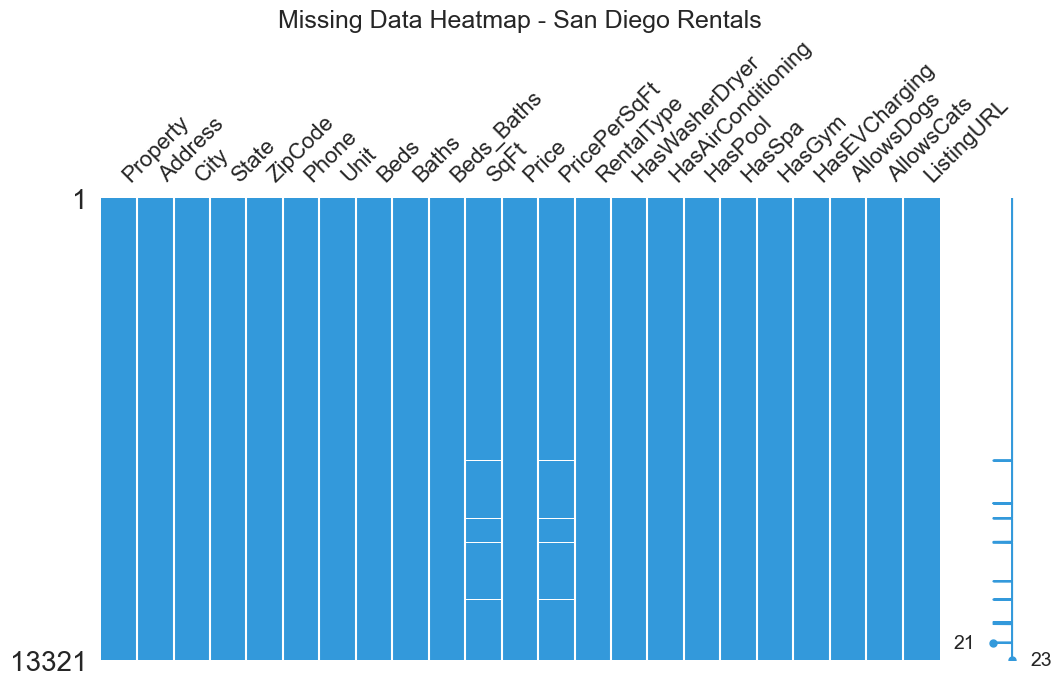

In [6]:
# 3. Visualizing Missing Data - ☀️ Heatmap View

import missingno as msno

# Light San Diego palette
msno.matrix(df, figsize=(12,6), color=(0.2, 0.6, 0.86))  # Ocean blue 🌊
plt.title('Missing Data Heatmap - San Diego Rentals', fontsize=18)
plt.show()

## Clean and Prep for Analysis

In [3]:
# Drop listings with missing Price or SqFt
df_clean = df.dropna(subset=['Price', 'SqFt']).copy()

# Recalculate PricePerSqFt
df_clean['PricePerSqFt'] = df_clean.apply(
    lambda row: round(row['Price'] / row['SqFt'], 2)
    if pd.notnull(row['Price']) and pd.notnull(row['SqFt']) and row['SqFt'] > 0 else None,
    axis=1
)

# Confirm shape
print(f"Listings after cleanup: {df_clean.shape[0]:,}")
print(f"Any missing PricePerSqFt? {df_clean['PricePerSqFt'].isnull().sum()} rows")


Listings after cleanup: 13,226
Any missing PricePerSqFt? 0 rows



## Rental Price Distribution & Outliers

Let’s explore:
- Distribution of monthly rent prices
- Spot expensive vs affordable units
- Zoomed-in view under $6,000 to reduce outlier distortion

---

### San Diego Rental Price Visuals:


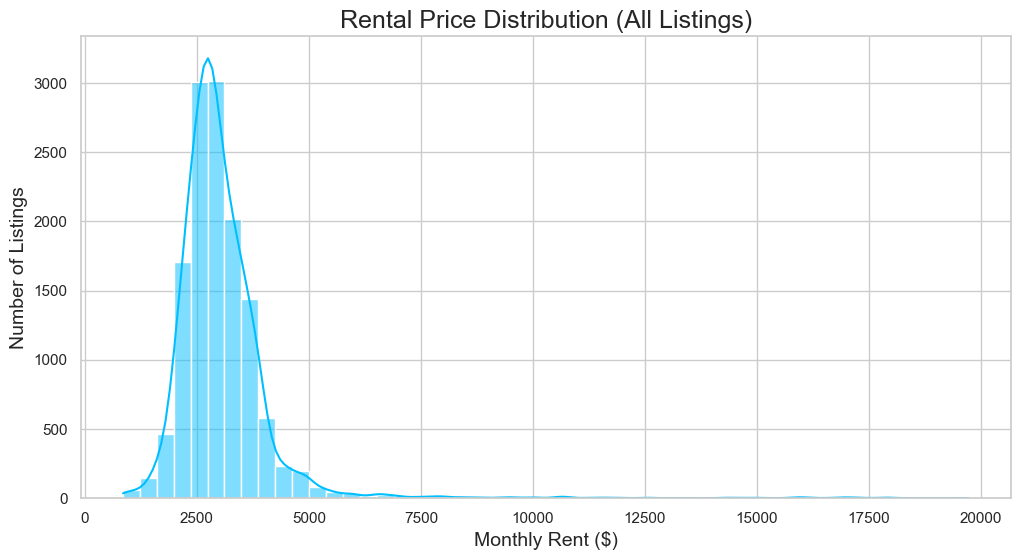

In [9]:
# Rental Price Distribution - Full Range
plt.figure(figsize=(12,6))
sns.histplot(df_clean['Price'], bins=50, kde=True)
plt.title('Rental Price Distribution (All Listings)', fontsize=18)
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Number of Listings')
plt.show()

### Key Takeaways:

#### 1. **Most Rentals Cluster Between $2,200–$3,800**
- This is the **heart of the market** — you can clearly see a strong concentration in this range.
- These are likely **1–2 bedroom apartments**, making them the most common rental type.

#### 2. **The Peak is Around $2,800–$3,200**
- The market **mode (most frequent range)** is here.
- This lines up with the **median value** of $2,875 from our earlier stats.

#### 3. **Right-Skewed Distribution**
- The **long tail to the right** (stretching up to ~$20,000) shows there are a **small number of ultra-premium listings** — likely penthouses, large homes, or luxury apartments.
- These outliers pull up the **mean rent (~$3,051)** above the median.

#### 4. **Data is Clean**
- No strange spikes, gaps, or unexpected clusters — a smooth, realistic curve.

---

### What This Tells Us:

- The **San Diego rental market is expensive**, with most listings well above $2,500/month.
- There’s a **healthy distribution**, but luxury listings cause skew.
- Great candidate for further segmentation (e.g., by city, zip, bedroom count, or amenities).

---

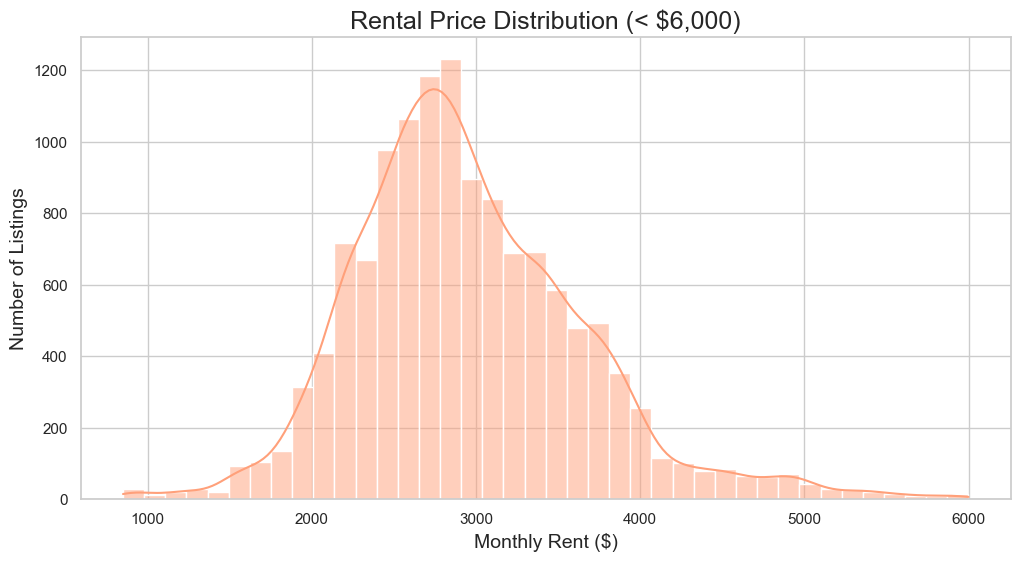

In [10]:
# 🌞 Zoomed In (under $6,000)
plt.figure(figsize=(12,6))
sns.histplot(df_clean[df_clean['Price'] < 6000]['Price'], bins=40, kde=True, color='#FFA07A')
plt.title('Rental Price Distribution (< $6,000)', fontsize=18)
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Number of Listings')
plt.show()



### Key Insights:

#### 1. **The Market Sweet Spot is $2,600–$3,200**
- This is the **peak** of the curve, with the **most common rents**.
- Reflects the **average asking price** for 1–2 bed apartments across the county.

####  2. **Skew Still Present — But Much Less Severe**
- By excluding ultra-luxury units, we now see a more **normal distribution shape**.
- There's a **gentle slope down** past $3,500, showing fewer larger or premium units.

#### 3. **Affordable Units Exist, But Are Rare**
- Listings under $1,800/month are very limited.
- Likely older buildings, smaller studios, or remote locations in the county.

#### 4. **Balanced View for Analysis**
- This view is perfect for modeling or comparing pricing tiers — no distortion from outliers like $19K listings.

---

### Recommendation

We'll keep **this filtered view** in mind when:
- Creating **summary tables** for 1–4 beds
- Looking at **city-level medians**
- Building **scatterplots or models** later on

---

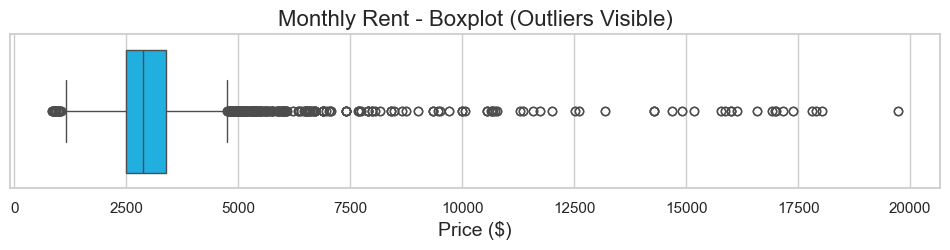

In [11]:
# 💸 Boxplot to catch outliers
plt.figure(figsize=(12,2))
sns.boxplot(data=df_clean, x='Price', color='#00BFFF')
plt.title('Monthly Rent - Boxplot (Outliers Visible)', fontsize=16)
plt.xlabel('Price ($)')
plt.show()

### What We Learn:

#### 1. **Median Rent Around $2,800–$3,000**
- Most listings fall around this range — matching our earlier histogram/kde insights.

#### 2. **Tight IQR (Most Listings Between ~$2,200 and ~$3,900)**
- That tight box means **rents are fairly concentrated** — especially for 1–2 bedroom units.

#### 3. **Outliers Are Abundant**
- Dozens of listings **above $6,000**, some approaching **$20,000/month**.
- These are likely:
  - Luxury penthouses
  - Ocean-view properties
  - Multi-bedroom homes in La Jolla or Del Mar

#### 4. **Data Has Positive Skew**
- Most data is **on the lower end**, but the right tail pulls the mean up.

---

### Why This Matters:

- Reinforces the value of **zoomed-in analysis** and **filters by bed count or city**
- Suggests that for modeling or price predictions, we may want to **cap or transform** extreme values
- Great visual to show **income disparity or housing cost pressure** in San Diego